# Przetwarzanie Grafiki i Muzyki - laboratorium nr 11

## Zadanie 1 (2 punkty)

  * Proszę wygenerować dane w kształcie sinusa.
  * Proszę dodać szum typu pieprz i sól
  * Proszę usunąć szum filtrem medianowym i średniej ruchomej.

Proszę narysować wykres sinusa, zaszumionego sinusa i odszumionego sinusa.

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

## Zadanie 2 (1 punkt)

 Proszę wygenerować dane w kształcie sinusa.
  * Proszę dodać szum Gaussowski
  * Proszę usunąć szum filtrem medianowym i średniej ruchomej.
  
Proszę narysować wykres sinusa, zaszumionego sinusa i odszumionego sinusa.

## Zadanie 3 (1 punkt)

Proszę wygenerować dane w kształcie sinusa i zapisać jako plik z rozszerzeniem .wav.

In [5]:
from scipy.io.wavfile import write
x = np.linspace(0, 4*np.pi, 1000)
sinus = np.sin(x)
sample_rate = 44100
write("sinus.wav", sample_rate, sinus)

## Zadanie 4 (1 punkt)

Proszę narysować głos: https://raw.githubusercontent.com/przem85/PGiM/master/img/ja1.wav

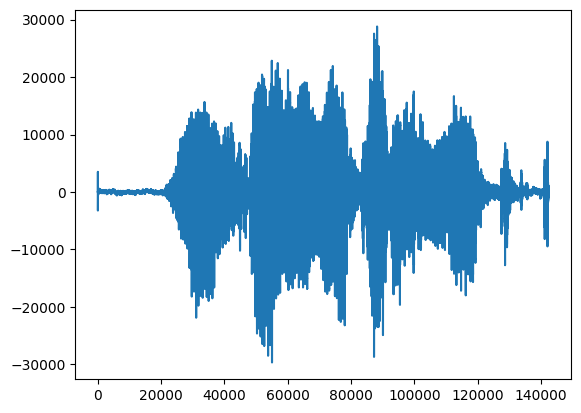

In [9]:
import wave

wavefile = wave.open("./img/ja1.wav", "r")

signal = wavefile.readframes(-1)
signal = np.frombuffer(signal, np.int16)

plt.figure(1)
plt.plot(signal)
plt.show()

## Zadanie 5 (2 punkty)

  * Proszę wykonać progowanie głosu.
  * Jeżeli wartość mniejsza niż 0 to -400, w odwrotnym przypadku 400.
  * Proszę narysować głos przed progowaniem i po progowaniu.

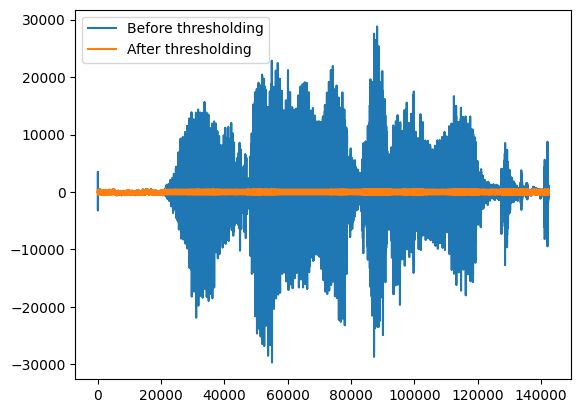

In [16]:
import wave

wavefile = wave.open("./img/ja1.wav", "r")

signal = wavefile.readframes(-1)
signal = np.frombuffer(signal, np.int16)

plt.figure(2)
plt.plot(signal)

threshold_signal = signal.copy()
threshold_signal[threshold_signal > 400] = 400
threshold_signal[threshold_signal < 0] = -400
plt.plot(threshold_signal)

plt.legend(["Before thresholding", "After thresholding"])

plt.show()

# Zadanie 6 (3 punkty) 

  * Proszę dodać szum typu pieprz i sól −200,200, Gaussowski N(0,200), jednostajny na odcinku [−200,200]
  * Proszę usunąć szum filtrem medianowym i średniej ruchomej.
  * Odpalić dźwięk przed i po filtrowaniu i porównać.

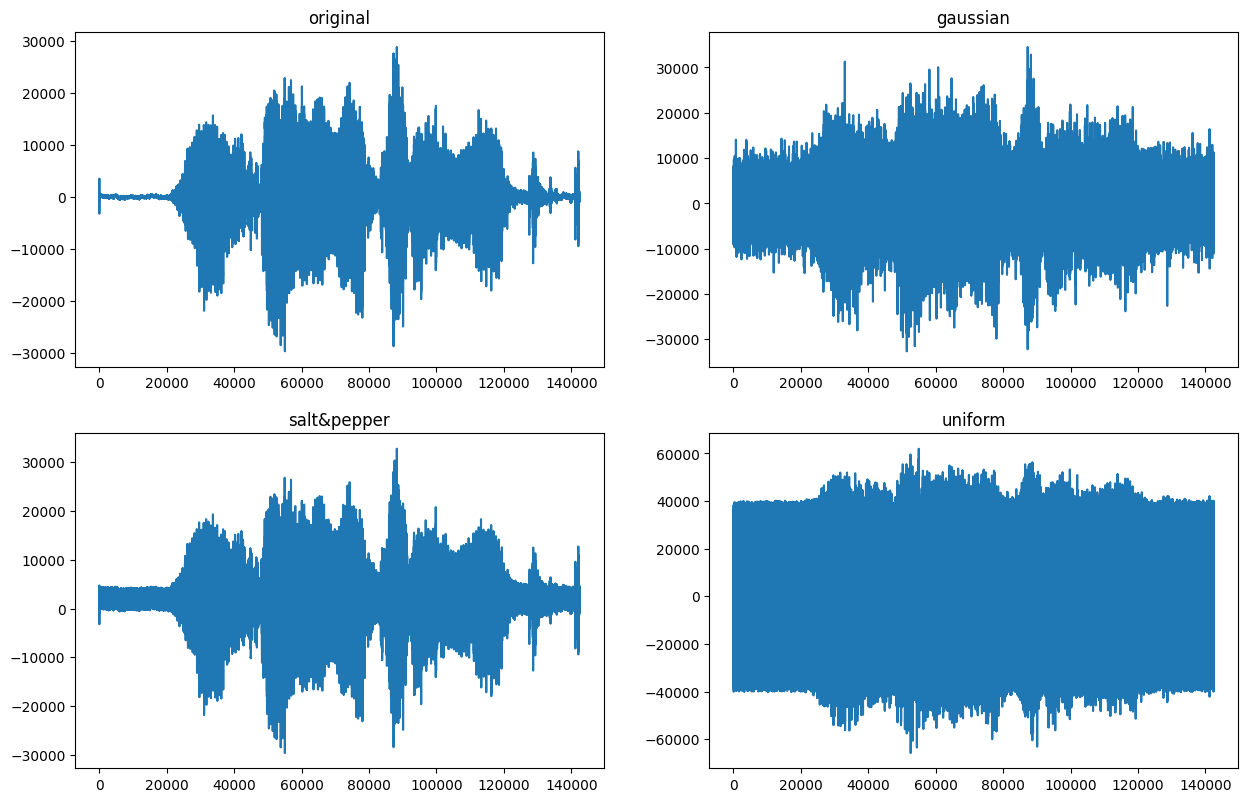

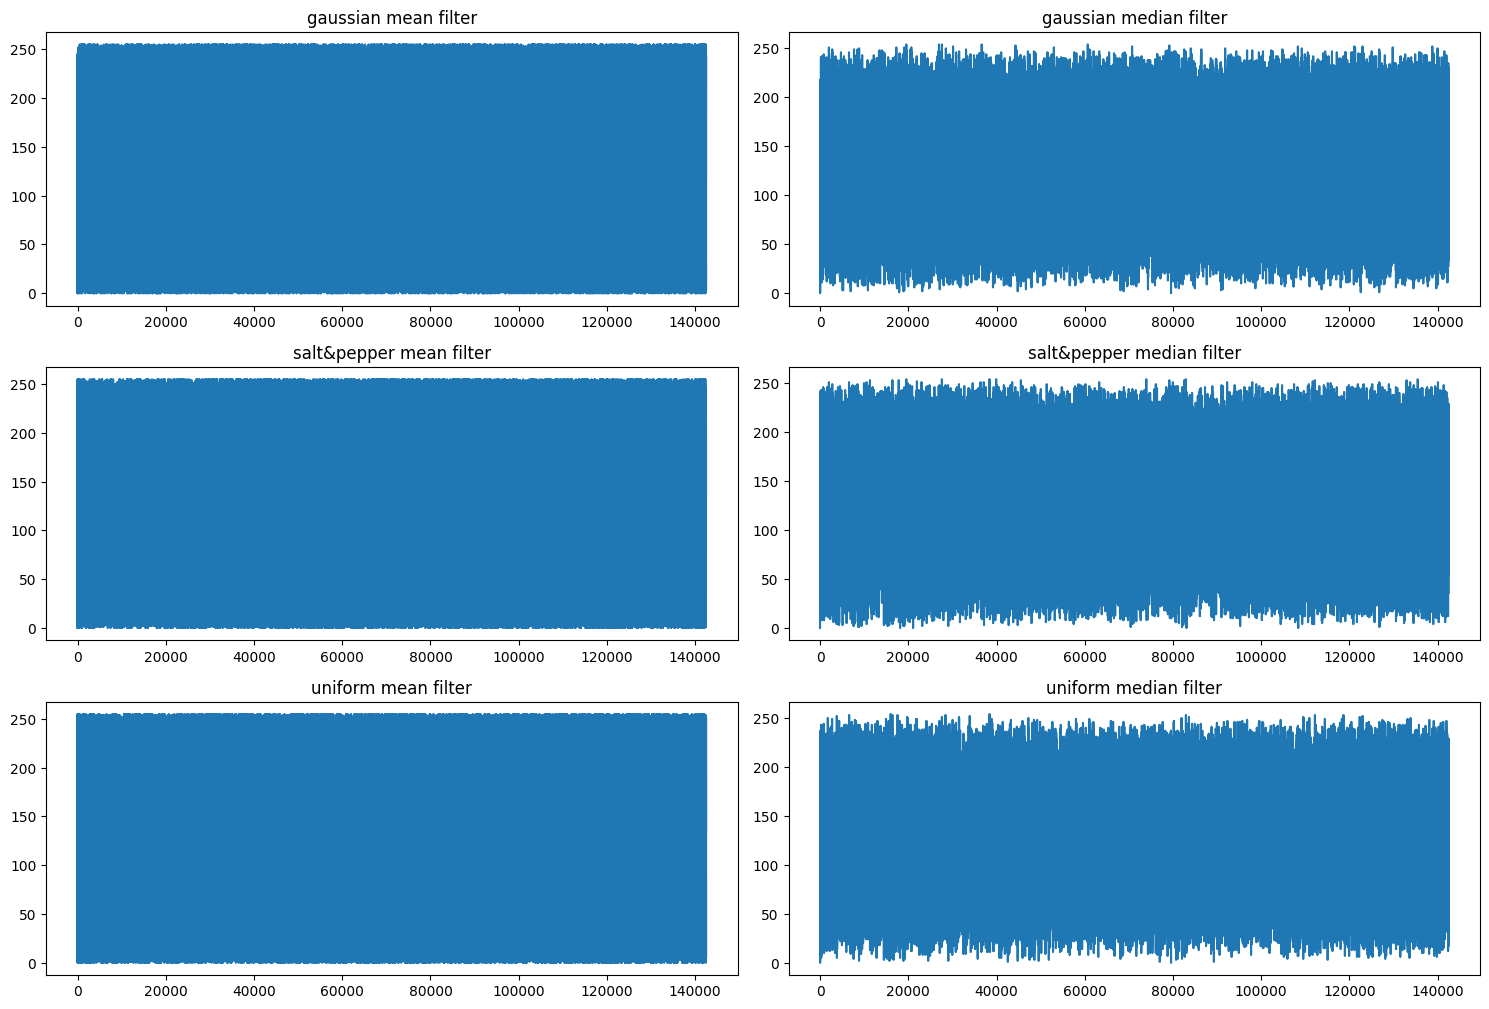

In [16]:
# TODO skonczyc
import wave

def add_uniform_noise(image, alpha: float):
    new_image = np.copy(image)
    mask = np.random.uniform(-alpha, alpha, new_image.shape)
    probabilities = np.random.choice([0, 1], new_image.shape)
    noise = mask * probabilities
    new_image = new_image + noise
    return new_image


def add_gaussian_noise(image, mi, square_sigma):
    new_image = np.copy(image)
    mask = np.random.normal(mi, square_sigma, new_image.shape)
    probabilities = np.random.choice([0, 1], new_image.shape)
    noise = mask * probabilities
    new_image = new_image + noise
    return new_image


def add_salt_pepper_noise(image):
    new_image = np.copy(image)
    mask = np.random.choice([0, 4000], new_image.shape)
    probabilities = np.random.choice([0, 1], new_image.shape)
    noise = mask * probabilities
    new_image = new_image + noise
    return new_image


def median_noise_filtration(data):
    median_filtered = np.copy(data)
    for channel in range(data.shape[1]):
        median_filtered[:, channel] = scipy.signal.medfilt(data[:, channel], kernel_size=5)
    return median_filtered

def mean_noise_filtration(data, window_size=5):
    filtered_data = np.copy(data)
    for channel in range(data.shape[1]):
        filtered_data[:, channel] = np.convolve(data[:, channel], np.ones(window_size) / window_size, mode='same')
    return filtered_data


wavefile = wave.open("./img/ja1.wav", "r")

signal = wavefile.readframes(-1)
signal = np.frombuffer(signal, np.int16)
gaussian_signal = add_gaussian_noise(signal, 0, 4000)
salt_pepper_signal = add_salt_pepper_noise(signal)
uniform_signal = add_uniform_noise(signal, 40000)

plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
plt.title("original")
plt.plot(signal)
plt.subplot(4, 2, 2)
plt.title("gaussian")
plt.plot(gaussian_signal)
plt.subplot(4, 2, 3)
plt.title("salt&pepper")
plt.plot(salt_pepper_signal)
plt.subplot(4, 2, 4)
plt.title("uniform")
plt.plot(uniform_signal)
plt.show()

gaussian_signal_median = cv2.medianBlur(gaussian_signal.astype(np.uint8), 5)
salt_pepper_signal_median = cv2.medianBlur(salt_pepper_signal.astype(np.uint8), 5)
uniform_signal_median = cv2.medianBlur(uniform_signal.astype(np.uint8), 5)

gaussian_signal_mean = cv2.blur(gaussian_signal.astype(np.uint8), (5, 1))
salt_pepper_signal_mean = cv2.blur(salt_pepper_signal.astype(np.uint8), (5, 1))
uniform_signal_mean = cv2.blur(uniform_signal.astype(np.uint8), (5, 1))

plt.figure(figsize=(15, 20))

plt.subplot(6, 2, 1)
plt.title("gaussian mean filter")
plt.plot(gaussian_signal_mean)
plt.subplot(6, 2, 2)
plt.title("gaussian median filter")
plt.plot(gaussian_signal_median)

plt.subplot(6, 2, 3)
plt.title("salt&pepper mean filter")
plt.plot(salt_pepper_signal_mean)
plt.subplot(6, 2, 4)
plt.title("salt&pepper median filter")
plt.plot(salt_pepper_signal_median)

plt.subplot(6, 2, 5)
plt.title("uniform mean filter")
plt.plot(uniform_signal_mean)
plt.subplot(6, 2, 6)
plt.title("uniform median filter")
plt.plot(uniform_signal_median)

plt.tight_layout()
plt.show()